# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import baricentric as bar
from scipy.interpolate import splprep,barycentric_interpolate,splev,splrep

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


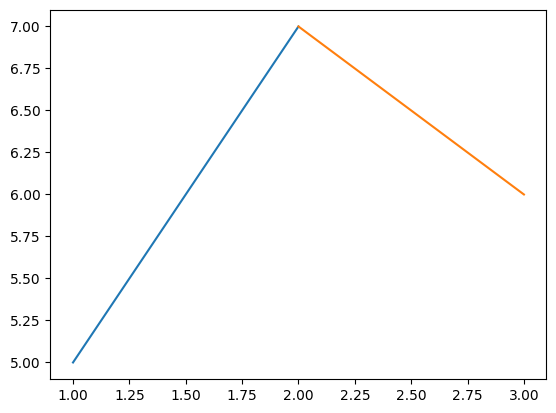

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


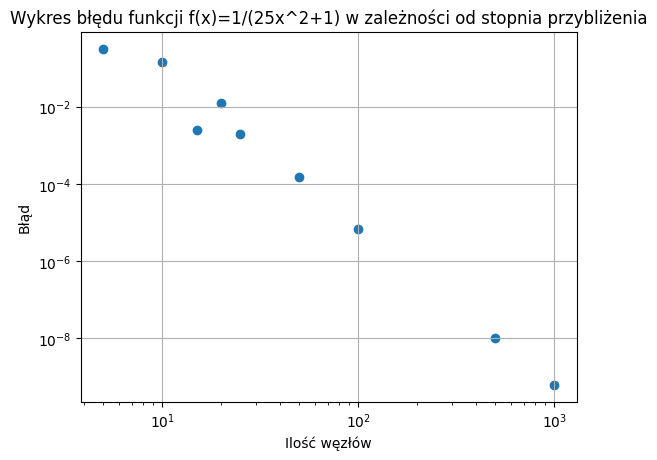

In [3]:
#Interpolacja funkcją z pakietu scipy.interpolate.splprep
f_1 =  lambda x: 1/(25*x**2+1)
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_1(x_i)
    sp1 = splrep(x_i, y_i)
    Y = splev(x, sp1)
    error.append(main.L_inf(Y, f_1(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/(25x^2+1) w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

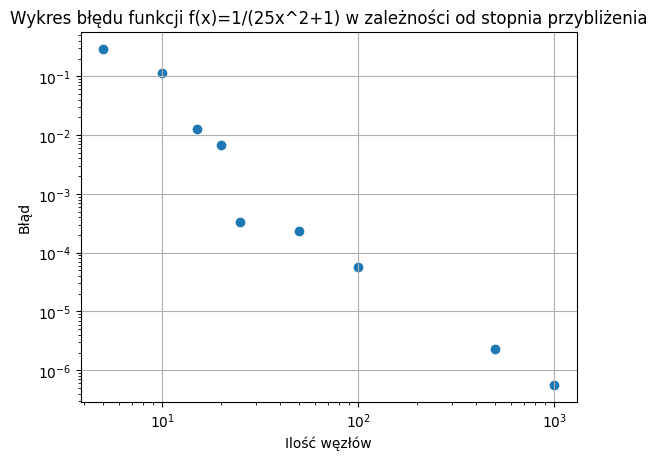

In [4]:
#Interpolacja funkcją z ubiegłego tygodnia
f_1 =  lambda x: 1/(25*x**2+1)
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_1(x_i)
    w_i = main.bar_czeb_weights(n-1)
    Y = main.barycentric_inte(x_i,y_i,w_i,x)
    error.append(main.L_inf(Y, f_1(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/(25x^2+1) w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

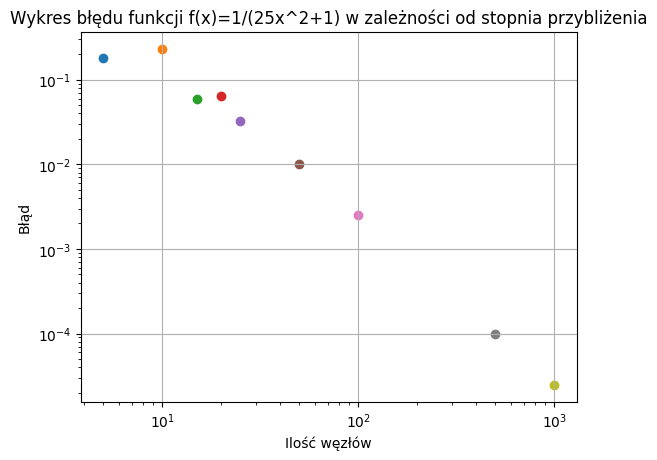

In [5]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_1 =  lambda x: 1/(25*x**2+1)
levels = np.array([5, 10, 15, 20, 25, 50, 100, 500, 1000])
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f_1(x))
    f = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f[i])

        x_abs = np.append(x_abs, x_new)
        y_abs = np.append(y_abs, y_new)
        

    error = main.L_inf(y_abs, f_1(x_abs))
    plt.scatter(n, error)
    


plt.title("Wykres błędu funkcji f(x)=1/(25x^2+1) w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

Najlepsze wyniki otrzymałam z funkcji z pakietu scipy.interpolate.splprep. Ma ona najmniejszy błąd przybliżenia w porównaniu do pozostałych metod z tego ćwiczenia. Najgorszą metodą okazała się funkcja wartości współczynników spline pierwszego stopnia.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


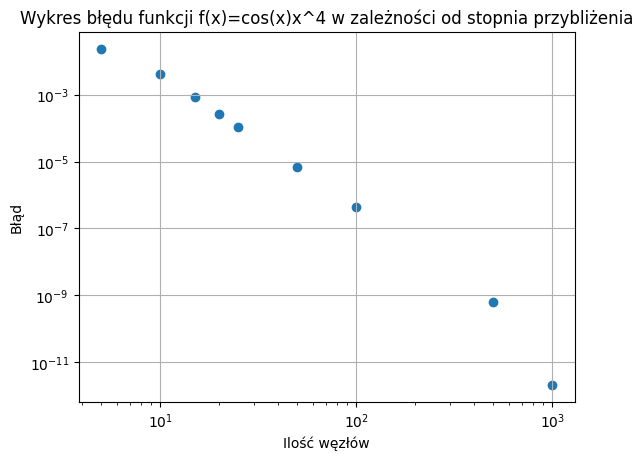

In [6]:
#Interpolacja funkcją z pakietu scipy.interpolate.splprep
f_2 =  lambda x: np.cos(x)*x**4
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_2(x_i)
    sp1 = splrep(x_i, y_i)
    Y = splev(x, sp1)
    error.append(main.L_inf(Y, f_2(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=cos(x)x^4 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

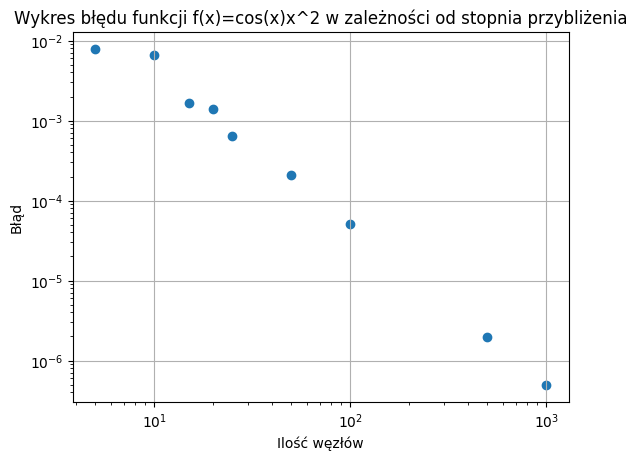

In [7]:
#Interpolacja funkcją z ubiegłego tygodnia
f_2 =  lambda x: np.cos(x)*x**4
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_2(x_i)
    w_i = main.bar_czeb_weights(n-1)
    Y = main.barycentric_inte(x_i,y_i,w_i,x)
    error.append(main.L_inf(Y, f_2(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=cos(x)x^2 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

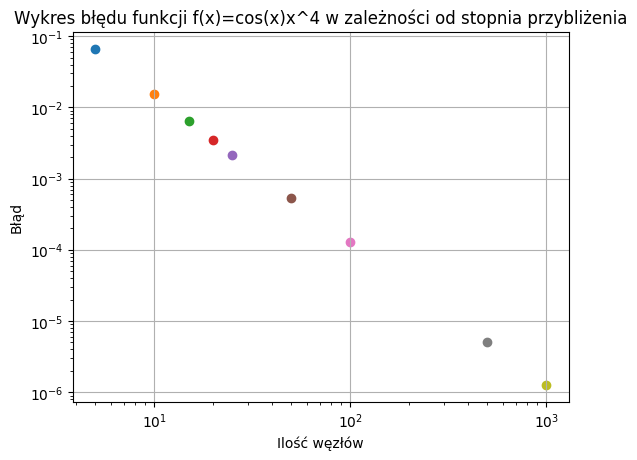

In [8]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_2 =  lambda x: np.cos(x)*x**4
levels = np.array([5, 10, 15, 20, 25, 50, 100, 500, 1000])
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f_2(x))
    f = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f[i])

        x_abs = np.append(x_abs, x_new)
        y_abs = np.append(y_abs, y_new)
        

    error = main.L_inf(y_abs, f_2(x_abs))
    plt.scatter(n, error)
    


plt.title("Wykres błędu funkcji f(x)=cos(x)x^4 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

 Kolejny raz funkcja wartości współczynników spline pierwszego stopnia wypadła najgorzej na tle pozostałych metod.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


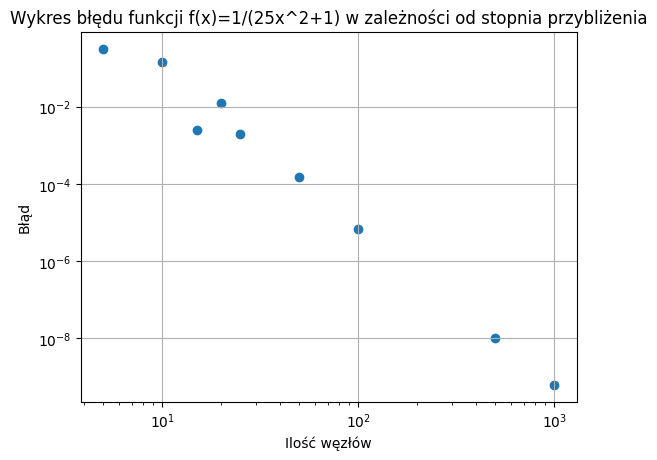

In [9]:
#Interpolacja funkcją z pakietu scipy.interpolate.splprep
f_3 =  lambda x: 1/(25*x**2+1)
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_3(x_i)
    sp1 = splrep(x_i, y_i)
    Y = splev(x, sp1)
    error.append(main.L_inf(Y, f_3(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/(25x^2+1) w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

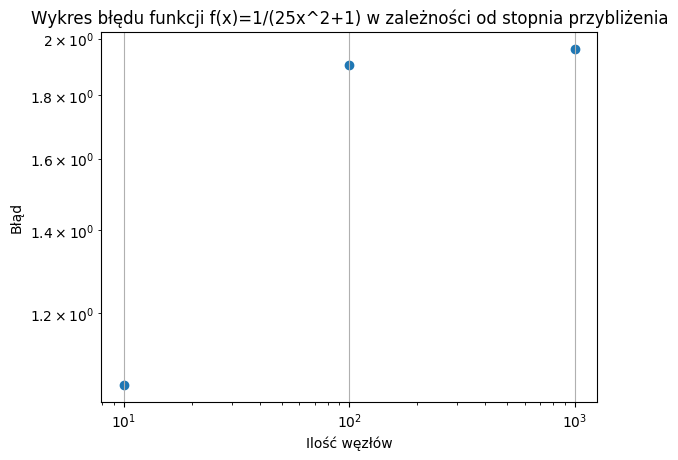

In [10]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_3 =  lambda x: 1/(25*x**2+1)
levels = [10, 100, 1000]
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    y = f_3(x)
    Y = np.array([])  
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new, f[i])

        Y = np.append(Y, x_new)
        X = np.append(X, y_new)
        

    error.append(main.L_inf(Y, f_3(X)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/(25x^2+1) w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

Funkcja z pakietu scipy daje lepsze wyniki, niż zaimplementowana samodzielnie funkcja, lecz jest to prawie niezauważalne. Natomiast różnica w szybkości algorytmów jest bardzo odczuwalna, interpolacja z pakietu scipy jest kilkukrotnie szybsza.

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


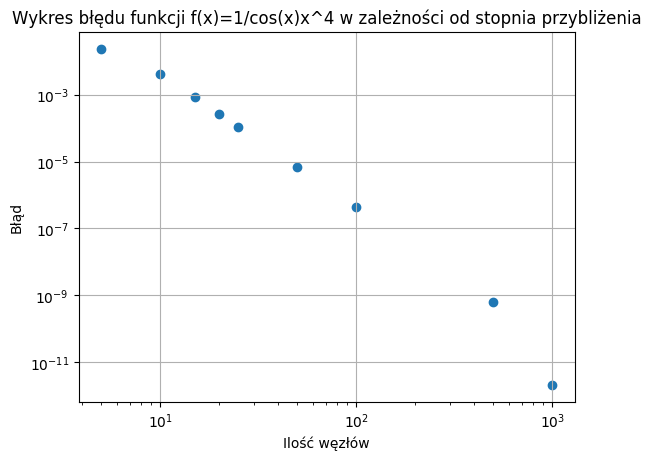

In [11]:
#Interpolacja funkcją z pakietu scipy.interpolate.splprep
f_4 =  lambda x: np.cos(x)*x**4
levels = [5, 10, 15, 20, 25, 50, 100, 500, 1000]
x = np.linspace(-1+1e-5,1-1e-5,1003)
error = []

for n in levels:
    x_i = np.linspace(-1,1,n)
    y_i = f_4(x_i)
    sp1 = splrep(x_i, y_i)
    Y = splev(x, sp1)
    error.append(main.L_inf(Y, f_4(x)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/cos(x)x^4 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

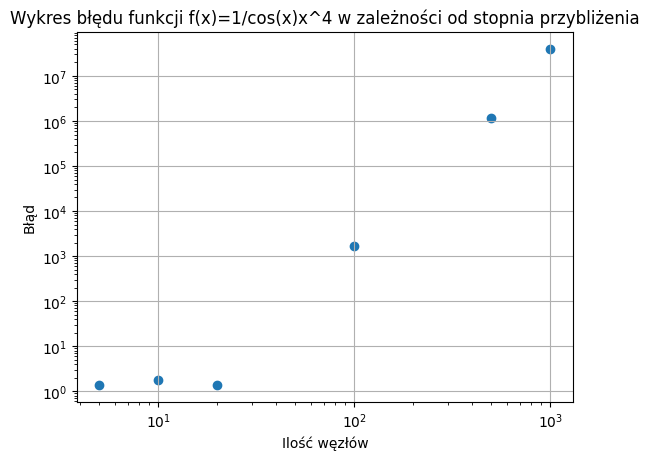

In [12]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_4 =  lambda x: np.cos(x)*x**4
levels = [5, 10, 20, 100, 500, 1000]
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    y = f_4(x)
    Y = np.array([])  
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new, f[i])

        Y = np.append(Y, x_new)
        X = np.append(X, y_new)
        

    error.append(main.L_inf(Y, f_4(X)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=1/cos(x)x^4 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

Funkcja z pakietu scipy daje lepsze wyniki, niż zaimplementowana samodzielnie funkcja. Natomiast różnica w szybkości algorytmów jest zauważalna.

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

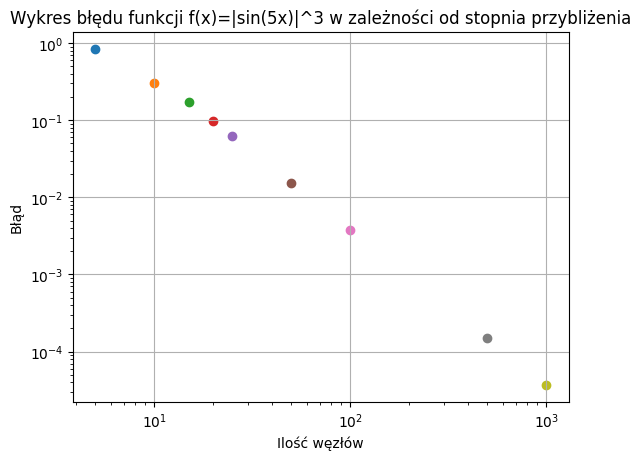

In [13]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_1 =  lambda x:  np.abs(np.sin(5*x))**3
levels = np.array([5, 10, 15, 20, 25, 50, 100, 500, 1000])
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    a,b = main.first_spline(x, f_1(x))
    f = [[b[i],a[i]] for i in range(len(a))]

    y_abs = np.array([])
    x_abs = np.array([])
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new , f[i])

        x_abs = np.append(x_abs, x_new)
        y_abs = np.append(y_abs, y_new)
        

    error = main.L_inf(y_abs, f_1(x_abs))
    plt.scatter(n, error)
    


plt.title("Wykres błędu funkcji f(x)=|sin(5x)|^3 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

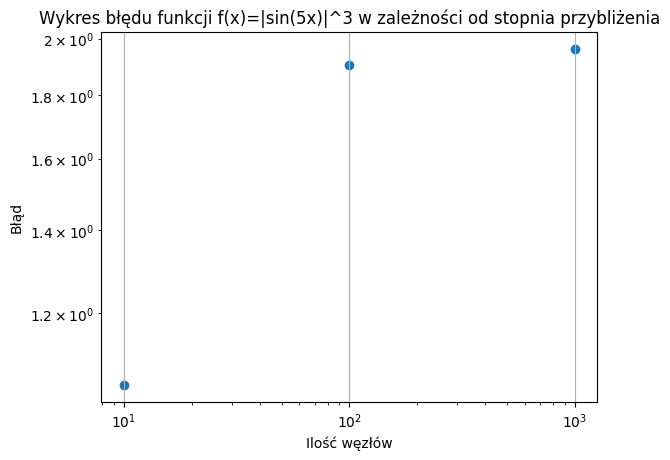

In [14]:
#Interpolacja sposobem z wartościami współczynników spline pierwszego stopnia
f_3 =  lambda x: 1/(25*x**2+1)
levels = [10, 100, 1000]
error = []

for n in levels:
    x = np.linspace(-1, 1, n)
    y = f_3(x)
    Y = np.array([])  
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]
    
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],10)
        y_new = PolyCoefficients(x_new, f[i])

        Y = np.append(Y, x_new)
        X = np.append(X, y_new)
        

    error.append(main.L_inf(Y, f_3(X)))
    

plt.scatter(levels, error)
plt.title("Wykres błędu funkcji f(x)=|sin(5x)|^3 w zależności od stopnia przybliżenia")
plt.xlabel("Ilość węzłów")
plt.ylabel("Błąd")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.show()

Funkcja z pakietu scipy daje lepsze wyniki, niż zaimplementowana samodzielnie funkcja. Natomiast różnica w szybkości algorytmów jest zauważalna.

**Wnioski**

Podczas tego ćwiczenia przećwiczyłam swoje umiejętności w wykorzystywaniu funkcji first_spline, interpolacji barycentrycznej z poprzednich ćwiczeń oraz metody z pakietu scipy.interpolate. Wykorzystane funkcje przy małej ilości węzłów dawały zbliżone wartości błędów.